# DoWhy example on the Lalonde dataset



##### Install dowhy using pip

In [ ]:
pip install dowhy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 122.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 113.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.1/571.1 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

##### import pandas

In [ ]:
import pandas as pd

## 1. Load the data

##### Load the lalonde dataset from lalonde_data.csv
you should have already uploaded the file in colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lalonde_data.csv to lalonde_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['lalonde_data.csv']))

##### Convert the type of the treatment column to boolean

In [ ]:
final_df = df.astype({'t':'bool'},copy=False)
final_df

,re78,t,black,hisp,age,married,nodegree,educ,re74,u74,re75,u75
0,9.93005,True,1,0,37,1,1,11,0.00000,1,0.0000,1
1,3.59589,True,0,1,22,0,1,9,0.00000,1,0.0000,1
2,24.90950,True,1,0,30,0,0,12,0.00000,1,0.0000,1
3,7.50615,True,1,0,27,0,1,11,0.00000,1,0.0000,1
4,0.28979,True,1,0,33,0,1,8,0.00000,1,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.00000,False,1,0,21,0,1,9,31.88640,0,12.3572,0
441,0.00000,False,1,0,28,0,1,11,17.49150,0,13.3713,0
442,16.90030,False,0,1,29,0,1,9,9.59431,0,16.3412,0
443,7.34396,False,1,0,25,1,1,9,24.73160,0,16.9466,0


## Run DoWhy analysis: model, identify, estimate

##### Create the causal model with:
    t as treatment
    re78 as outcome, and
    nodegree, black, hisp, age, edu, and married as covariates

In [ ]:
pip install econml

In [ ]:
from dowhy import CausalModel
from statsmodels.api import OLS
model_dwl = CausalModel(data=df, treatment='t', outcome='re78', common_causes='nodegree+black+hisp+age+educ+married'.split('+'))

##### View the causal model graphically

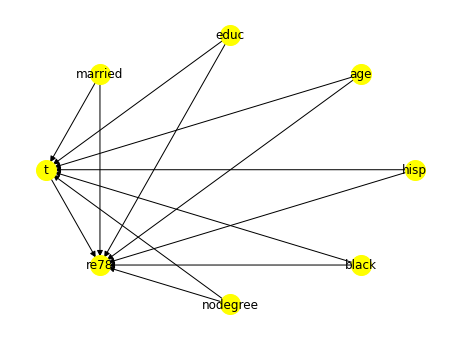

In [ ]:
model_dwl.view_model()

##### Identify and print the estimand

In [ ]:
from dowhy.causal_identifier import identified_estimand
identified_estimand = model_dwl.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                                                
────(E[re78|age,black,hisp,educ,nodegree,married])
d[t]                                              
Estimand assumption 1, Unconfoundedness: If U→{t} and U→re78 then P(re78|t,age,black,hisp,educ,nodegree,married,U) = P(re78|t,age,black,hisp,educ,nodegree,married)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



##### Estimate the causal effect (ATE) using:
    weighting
    stratification, and
    matching

In [ ]:
estimateWeight = model_dwl.estimate_effect(identified_estimand,
                                            method_name='backdoor.propensity_score_weighting',
                                            target_units='ate',
                                            method_params={'weighting_scheme':'ips_weight'})

In [ ]:
estimateStrat = model_dwl.estimate_effect(identified_estimand,
                                            method_name='backdoor.propensity_score_stratification',
                                            target_units='ate')

In [ ]:
estimateMatch = model_dwl.estimate_effect(identified_estimand,
                                            method_name='backdoor.propensity_score_matching',
                                            target_units='ate')

In [ ]:
print(estimateWeight)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                                                
────(E[re78|age,black,hisp,educ,nodegree,married])
d[t]                                              
Estimand assumption 1, Unconfoundedness: If U→{t} and U→re78 then P(re78|t,age,black,hisp,educ,nodegree,married,U) = P(re78|t,age,black,hisp,educ,nodegree,married)

## Realized estimand
b: re78~t+age+black+hisp+educ+nodegree+married
Target units: ate

## Estimate
Mean value: 1.6397983047216202



In [ ]:
print(estimateStrat)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                                                
────(E[re78|age,black,hisp,educ,nodegree,married])
d[t]                                              
Estimand assumption 1, Unconfoundedness: If U→{t} and U→re78 then P(re78|t,age,black,hisp,educ,nodegree,married,U) = P(re78|t,age,black,hisp,educ,nodegree,married)

## Realized estimand
b: re78~t+age+black+hisp+educ+nodegree+married
Target units: ate

## Estimate
Mean value: 1.8383602440424647



In [ ]:
print(estimateMatch)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                                                
────(E[re78|age,black,hisp,educ,nodegree,married])
d[t]                                              
Estimand assumption 1, Unconfoundedness: If U→{t} and U→re78 then P(re78|t,age,black,hisp,educ,nodegree,married,U) = P(re78|t,age,black,hisp,educ,nodegree,married)

## Realized estimand
b: re78~t+age+black+hisp+educ+nodegree+married
Target units: ate

## Estimate
Mean value: 1.4985535896629214

